In [1]:
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# split the train and test dataset
X_train, X_test,\
	y_train, y_test = train_test_split(X, y,
									test_size=0.20,
									random_state=23)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)


Logistic Regression model accuracy (in %): 95.6140350877193


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Multinomial Logistic Regression:

Target variable can have 3 or more possible types which are not ordered (i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”.

In this case, the softmax function is used in place of the sigmoid function. Softmax function for K classes will be:

image.png

Here, K represents the number of elements in the vector z, and i, j iterates over all the elements in the vector.

Then the probability for class c will be:
image.png

In Multinomial Logistic Regression, the output variable can have more than two possible discrete outputs. Consider the Digit Dataset.




In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

# load the digit dataset
digits = datasets.load_digits()

# defining feature matrix(X) and response vector(y)
X = digits.data
y = digits.target

# splitting X and y into training and testing sets
X_train, X_test,\
	y_train, y_test = train_test_split(X, y,
									test_size=0.4,
									random_state=1)

# create logistic regression object
reg = linear_model.LogisticRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# making predictions on the testing set
y_pred = reg.predict(X_test)

# comparing actual response values (y_test)
# with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
	metrics.accuracy_score(y_test, y_pred)*100)


Logistic Regression model accuracy(in %): 96.52294853963839


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Implementation of Logistic Regression using Python


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


Read and Explore the data

In [4]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)


This code loads the diabetes dataset using the load_diabetes function from scikit-learn, passing in feature data X and target values y. Then, it converts the binary representation of the continuous target variable y. A patient’s diabetes measure is classified as 1 (indicating diabetes) if it is higher than the median value, and as 0 (showing no diabetes).



Splitting The Dataset: Train and Test dataset
Splitting the dataset to train and test. 80% of data is used for training the model and 20% of it is used to test the performance of our model.  

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y_binary, test_size=0.2, random_state=42)


This code divides the diabetes dataset into training and testing sets using the train_test_split function from scikit-learn: The binary target variable is called y_binary, and the characteristics are contained in X. The data is divided into testing (X_test, y_test) and training (X_train, y_train) sets. Twenty percent of the data will be used for testing, according to the setting test_size=0.2. By employing a fixed seed for randomization throughout the split, random_state=42 guarantees reproducibility.



Feature Scaling

In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


This code uses StandardScaler from scikit-learn to achieve feature standardization:


The StandardScaler instance is created; this will be used to standardize the features. It uses the scaler’s fit_transform method to normalize the training data (X_train) and determine its mean and standard deviation. Then, itstandardizes the testing data (X_test) using the calculated mean and standard deviation from the training set. Model training and evaluation are made easier by standardization, which guarantees that the features have a mean of 0 and a standard deviation of 1.


Train The Model



In [7]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Using scikit-learn’s LogisticRegression, this code trains a logistic regression model:

It establishes a logistic regression model instance.Then, itemploys the fit approach to train the model using the binary target values (y_train) and standardized training data (X_train). Following execution, the model object may now be used to forecast new data using the patterns it has learnt from the training set.

Evaluation Metrics
Metrics are used to check the model performance on predicted values and actual values.

In [8]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 73.03%


This code predicts the target variable and computes its accuracy in order to assess the logistic regression model on the test set. The accuracy_score function is then used to compare the predicted values in the y_pred array with the actual target values (y_test).

Confusion Matrix and Classification Report

In [9]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



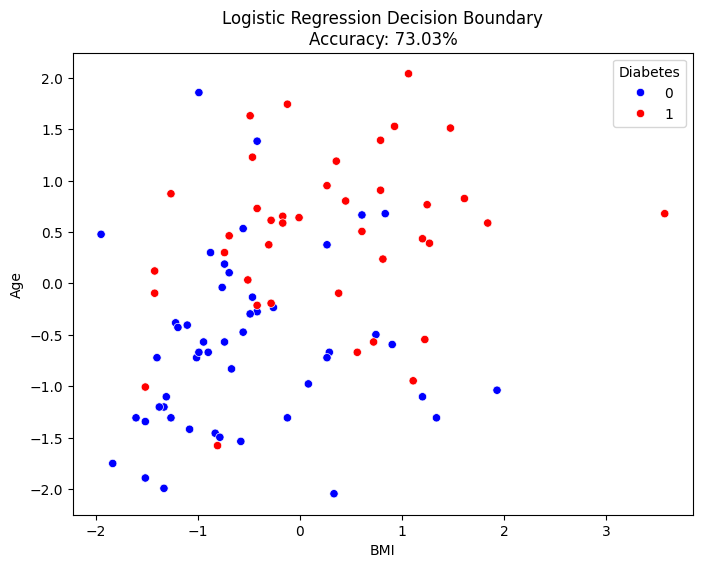

In [10]:
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
				0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()


To see a logistic regression model’s decision border, this code creates a scatter plot. An individual from the test set is represented by each point on the plot, which has age on the Y-axis and BMI on the X-axis. The points are color-coded according to the actual status of diabetes, making it easier to evaluate how well the model differentiates between those with and without the disease. An instant visual context for the model’s performance on the test data is provided by the plot’s title, which includes the accuracy information. The inscription located in the upper right corner denotes the colors that represent diabetes (1) and no diabetes (0).



Plotting ROC Curve

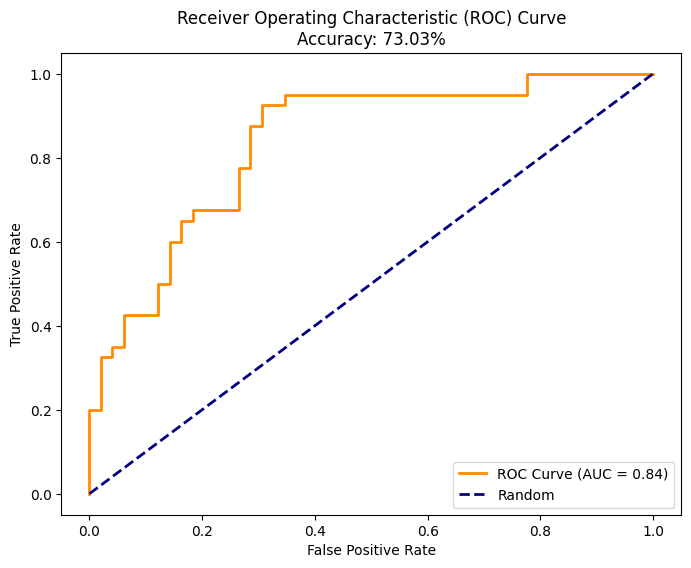

In [11]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
	accuracy * 100))
plt.legend(loc="lower right")
plt.show()


For the logistic regression model, this code creates and presents the Receiver Operating Characteristic (ROC) curve. The true positive rate (sensitivity) and false positive rate at different threshold values are determined using the probability estimates for positive outcomes (y_prob), which are obtained using the predict_proba method. Use of the roc_auc_score yields the area under the ROC curve (AUC). An illustration of the resulting curve is provided, and the legend shows the AUC value. The ROC curve for a random classifier is shown by the dotted line.



Logistic Regression using Tensorflow

Logistic Regression is Classification algorithm commonly used in Machine Learning. It allows categorizing data into discrete classes by learning the relationship from a given set of labeled data. It learns a linear relationship from the given dataset and then introduces a non-linearity in the form of the Sigmoid function. In case of Logistic regression, the hypothesis is the Sigmoid of a straight line, i.e,
image.png

image.png

Where the vector w represents the Weights and the scalar b represents the Bias of the model. Let us visualize the Sigmoid Function –

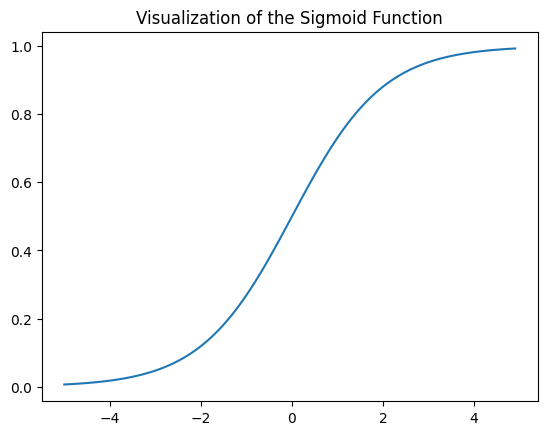

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
	return 1 / (1 + np.exp( - z))

plt.plot(np.arange(-5, 5, 0.1), sigmoid(np.arange(-5, 5, 0.1)))
plt.title('Visualization of the Sigmoid Function')

plt.show()


Note that the range of the Sigmoid function is (0, 1) which means that the resultant values are in between 0 and 1. This property of Sigmoid function makes it a really good choice of Activation Function for Binary Classification. Also for z = 0, Sigmoid(z) = 0.5 which is the midpoint of the range of Sigmoid function. Just like Linear Regression, we need to find the optimal values of w and b for which the cost function J is minimum. In this case, we will be using the Sigmoid Cross Entropy cost function which is given by

image.png

This cost function will then be optimized using Gradient Descent. Implementation: We will start by importing the necessary libraries. We will use Numpy along with Tensorflow for computations, Pandas for basic Data Analysis and Matplotlib for plotting. We will also be using the preprocessing module of Scikit-Learn for One Hot Encoding the data.

In [13]:
# importing modules
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [14]:
data = pd.read_csv('dataset.csv', header = None)
print("Data Shape:", data.shape)

print(data.head())


Data Shape: (100, 4)
   0    1    2  3
0  0  5.1  3.5  1
1  1  4.9  3.0  1
2  2  4.7  3.2  1
3  3  4.6  3.1  1
4  4  5.0  3.6  1


Now let’s get the feature matrix and the corresponding labels and visualize.

In [15]:
# Feature Matrix
x_orig = data.iloc[:, 1:-1].values

# Data labels
y_orig = data.iloc[:, -1:].values

print("Shape of Feature Matrix:", x_orig.shape)
print("Shape Label Vector:", y_orig.shape)


Shape of Feature Matrix: (100, 2)
Shape Label Vector: (100, 1)


Visualize the given data.

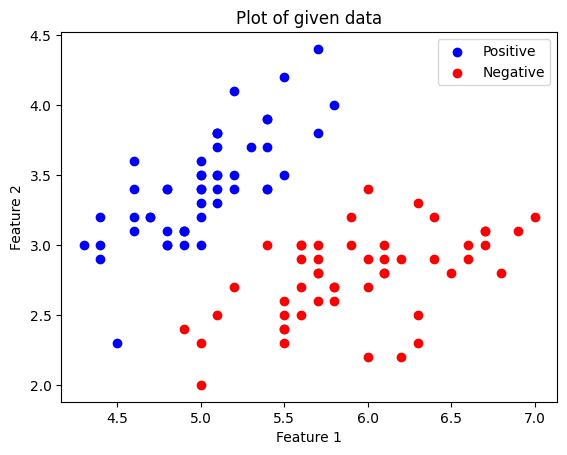

In [16]:
# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 1])

# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 0])

# Plotting the Positive Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive')

# Plotting the Negative Data Points
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.legend()

plt.show()


Now we will be One Hot Encoding the data for it to work with the algorithm. One hot encoding transforms categorical features to a format that works better with classification and regression algorithms. We will also be setting the Learning Rate and the number of Epochs.



In [17]:
# Creating the One Hot Encoder
oneHot = OneHotEncoder()

# Encoding x_orig
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

# Encoding y_orig
oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()

alpha, epochs = 0.0035, 500
m, n = x.shape
print('m =', m)
print('n =', n)
print('Learning Rate =', alpha)
print('Number of Epochs =', epochs)


m = 100
n = 51
Learning Rate = 0.0035
Number of Epochs = 500


Now we will start creating the model by defining the placeholders X and Y, so that we can feed our training examples x and y into the optimizer during the training process. We will also be creating the trainable Variables W and b which can be optimized by the Gradient Descent Optimizer.

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [20]:
# There are n columns in the feature matrix
# after One Hot Encoding.
X = tf.placeholder(tf.float32, [None, n])

# Since this is a binary classification problem,
# Y can take only 2 values.
Y = tf.placeholder(tf.float32, [None, 2])

# Trainable Variable Weights
W = tf.Variable(tf.zeros([n, 2]))

# Trainable Variable Bias
b = tf.Variable(tf.zeros([2]))


Now declare the Hypothesis, Cost function, Optimizer and Global Variables Initializer.

In [21]:
# Hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(
					logits = Y_hat, labels = Y)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(
		learning_rate = alpha).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()


Begin the training process inside a Tensorflow Session.



In [22]:
# Starting the Tensorflow Session
with tf.Session() as sess:

	# Initializing the Variables
	sess.run(init)

	# Lists for storing the changing Cost and Accuracy in every Epoch
	cost_history, accuracy_history = [], []

	# Iterating through all the epochs
	for epoch in range(epochs):
		cost_per_epoch = 0

		# Running the Optimizer
		sess.run(optimizer, feed_dict = {X : x, Y : y})

		# Calculating cost on current Epoch
		c = sess.run(cost, feed_dict = {X : x, Y : y})

		# Calculating accuracy on current Epoch
		correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
										tf.argmax(Y, 1))
		accuracy = tf.reduce_mean(tf.cast(correct_prediction,
												tf.float32))

		# Storing Cost and Accuracy to the history
		cost_history.append(sum(sum(c)))
		accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)

		# Displaying result on current Epoch
		if epoch % 100 == 0 and epoch != 0:
			print("Epoch " + str(epoch) + " Cost: "
							+ str(cost_history[-1]))

	Weight = sess.run(W) # Optimized Weight
	Bias = sess.run(b) # Optimized Bias

	# Final Accuracy
	correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
									tf.argmax(Y, 1))
	accuracy = tf.reduce_mean(tf.cast(correct_prediction,
											tf.float32))
	print("\nAccuracy:", accuracy_history[-1], "%")


Epoch 100 Cost: 136.33413696289062
Epoch 200 Cost: 132.68544006347656
Epoch 300 Cost: 129.771240234375
Epoch 400 Cost: 127.29396057128906

Accuracy: 87.00000047683716 %


Let’s plot the change of cost over the epochs.

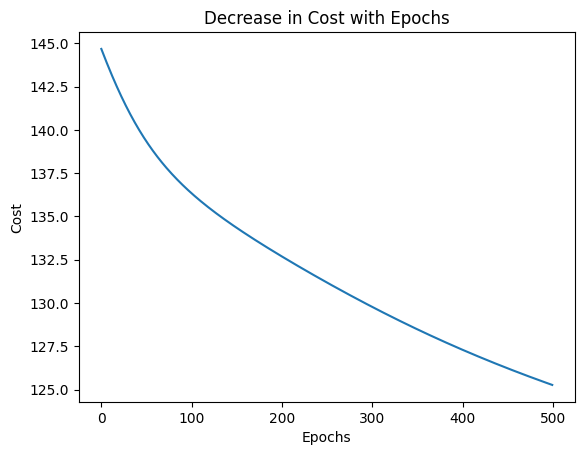

In [25]:
plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')

plt.show()


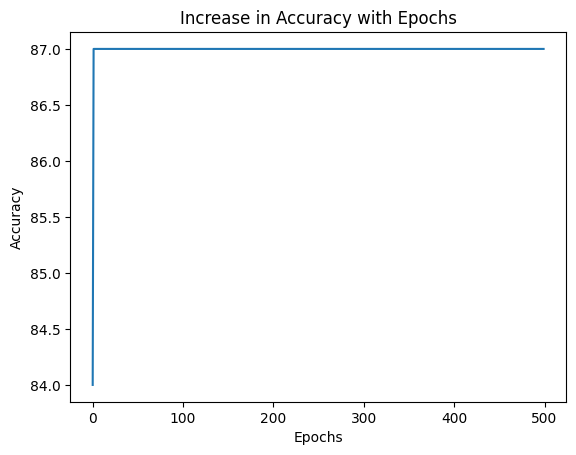

In [24]:
plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')

plt.show()


Now we will be plotting the Decision Boundary for our trained classifier. A decision boundary is a hypersurface that partitions the underlying vector space into two sets, one for each class.



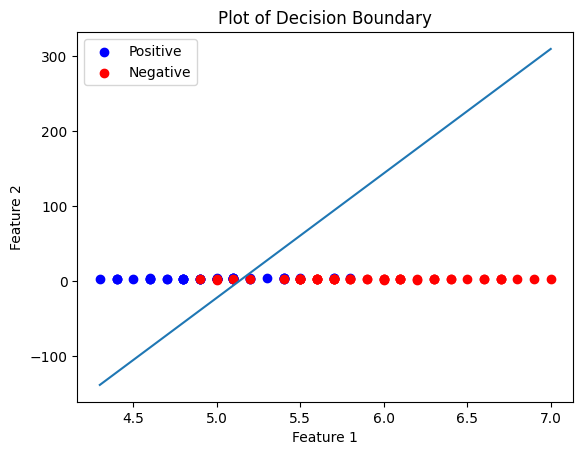

In [29]:
# Calculating the Decision Boundary
decision_boundary_x = np.array([np.min(x_orig[:, 0]),
							np.max(x_orig[:, 0])])

decision_boundary_y = (- 1.0 / Weight[0]) * (decision_boundary_x * Weight + Bias)

decision_boundary_y = [sum(decision_boundary_y[:, 0]),
					sum(decision_boundary_y[:, 1])]

# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 1])

# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 0])

# Plotting the Positive Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1],
color = 'blue', label = 'Positive')

# Plotting the Negative Data Points
plt.scatter(x_neg[:, 0], x_neg[:, 1],
color = 'red', label = 'Negative')

# Plotting the Decision Boundary
plt.plot(decision_boundary_x, decision_boundary_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of Decision Boundary')
plt.legend()

plt.show()
